In [107]:
#Almacenamos los mensajes de los agricultores que servirán de ejemplo en una lista
mensajes = [
"Xf, podría en mango criollo aplicar al follaje biol + phayton ( cobre) en una sola combinación?,  Gracias", 
"Hola muy buenos dias a toda la comunidad agros aque presio esta el limon en el mercado  mayorista en lima",
"Tengo 2 plantas mango Kent con muerte regresiva ,les aplique cobre pentahidratado ,ya 2  semanas y no veo indicadores d mejoría,gracias",
"Grasias a toda la comunidad agros por mantenernos informados a los pequeños agricultores"
]

In [116]:
#Concatenamos los mensajes en una sola cadena de texto para poder trabajar con ella
mensaje = ' '.join(mensajes)
print(mensaje)

Xf, podría en mango criollo aplicar al follaje biol + phayton ( cobre) en una sola combinación?,  Gracias Hola muy buenos dias a toda la comunidad agros aque presio esta el limon en el mercado  mayorista en lima Tengo 2 plantas mango Kent con muerte regresiva ,les aplique cobre pentahidratado ,ya 2  semanas y no veo indicadores d mejoría,gracias Grasias a toda la comunidad agros por mantenernos informados a los pequeños agricultores


In [123]:
mensaje =mensajes[0]+" "+mensajes[1]+" "+mensajes[2]+mensajes[3]

In [124]:
#Eliminamos carácteres que no serán considerados
caracteres = ":.,;()¿?!¡+-*/"

for x in range(len(caracteres)):
    mensaje = mensaje.replace(caracteres[x]," ")
mensaje = mensaje.lower()
lista_palabras = mensaje.split()
print(lista_palabras)

['xf', 'podría', 'en', 'mango', 'criollo', 'aplicar', 'al', 'follaje', 'biol', 'phayton', 'cobre', 'en', 'una', 'sola', 'combinación', 'gracias', 'hola', 'muy', 'buenos', 'dias', 'a', 'toda', 'la', 'comunidad', 'agros', 'aque', 'presio', 'esta', 'el', 'limon', 'en', 'el', 'mercado', 'mayorista', 'en', 'lima', 'tengo', '2', 'plantas', 'mango', 'kent', 'con', 'muerte', 'regresiva', 'les', 'aplique', 'cobre', 'pentahidratado', 'ya', '2', 'semanas', 'y', 'no', 'veo', 'indicadores', 'd', 'mejoría', 'graciasgrasias', 'a', 'toda', 'la', 'comunidad', 'agros', 'por', 'mantenernos', 'informados', 'a', 'los', 'pequeños', 'agricultores']


In [125]:
#Utilizamos un corrector ortográfico (obtenido de GitHub*), pero usamos un diccionario propio (Libro: 'El cultivo del mango'**)
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('libro_cultivo_de_mango.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))
    
#*Flores (2018): Spell Correct. Obtenido de: https://gist.github.com/MiguelAngelHFlores/2f241ad5c1c4810ba94539d77142a29d#file-spell-correct
#**Jimenez (2003): 'El cultivo del mango'. Obtenido de: http://usi.earth.ac.cr/glas/sp/Mango/mango.htm

In [126]:
#Utilizamos el corrector ortográfico para corregir las palabras mal escritas
texto_corregido = ""
for palabra in lista_palabras:
  palabra = correction(palabra)
  texto_corregido+=palabra+" "
print(texto_corregido)

TypeError: ignored

In [120]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(texto_corregido)

ValueError: ignored

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

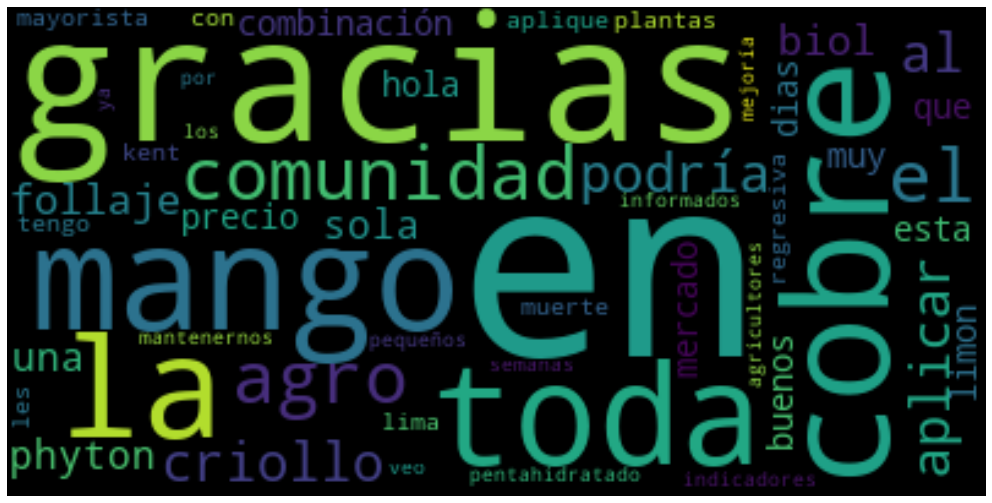

In [91]:
%pylab inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")